# Data Import, Cleaning, and EDA for AirBnB listings in Mexico City
from insideairbnb.com

## Import Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

## Import Data
Free Data is available quarterly so I have imported listings one year back starting in June 2022

In [91]:
june = pd.read_csv("./data/listings_june.csv")
june["last_scraped"].unique()

array(['2022-06-21', '2022-06-22'], dtype=object)

In [35]:
march = pd.read_csv("./data/listings_march.csv")
march["last_scraped"].unique()

array(['2022-03-27', '2022-03-26'], dtype=object)

In [36]:
dec = pd.read_csv("./data/listings_dec.csv")
dec["last_scraped"].unique()

array(['2021-12-26', '2021-12-25', '2021-12-29'], dtype=object)

In [37]:
sep = pd.read_csv("./data/listings_sept.csv")
sep["last_scraped"].unique()

array(['2021-09-30', '2021-09-29', '2021-09-28', '2021-10-06'],
      dtype=object)

## Drop features with high proportion of missing values

In [38]:
# Determine NaN rates and drop features with > 80% NaNs
thresh = 0.95
nan_rates = june.isna().sum(axis=0).sort_values(ascending=False) / float(len(june))
june.drop(nan_rates[nan_rates > thresh].index, axis=1, inplace=True)
print(
    f"Removed {len(nan_rates[nan_rates > thresh])} features with > {thresh*100}% missing values"
)

# Also drop rows with all NaNs
june.dropna(how="all", inplace=True)

Removed 4 features with > 95.0% missing values


In [39]:
june.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 

In [40]:
june['host_response_time'].unique()

array([nan, 'a few days or more', 'within an hour', 'within a few hours',
       'within a day'], dtype=object)

In [41]:
# Must revisit this drop since there is useful info here that I'm dropping for simplicity
june.drop(columns=['property_type', 'amenities', 'calendar_last_scraped'], inplace=True)

In [42]:
june = june.astype(
    {
        "last_scraped": "datetime64",
        "host_since": "datetime64",
        'first_review': 'datetime64',
        'last_review': 'datetime64',
    }
)

In [43]:
june["host_response_rate"] = (
    june["host_response_rate"].str.replace("%", "").fillna(0).astype("float") / 100.0
)

In [44]:
june["host_acceptance_rate"] = (
    june["host_acceptance_rate"].str.replace("%", "").fillna(0).astype("float") / 100.0
)

In [45]:
june["host_is_superhost"] = (
    june["host_is_superhost"].map({"f": 0, "t": 1}).astype("bool")
)

In [46]:
june["host_identity_verified"] = (
    june["host_identity_verified"].map({"f": 0, "t": 1}).astype("bool")
)

In [47]:
june['bathrooms_text'] = june["bathrooms_text"].map(
    {
        "3 baths": "3 a",
        "1 bath": "1 a",
        "1 private bath": "1 a",
        "5.5 baths": "5.5 a",
        "1 shared bath": "1 b",
        "1.5 baths": "1.5 a",
        "1.5 shared baths": "1.5 b",
        "2 baths": "2 a",
        "5 baths": "5 a",
        "4.5 baths": "4.5 a",
        "2.5 baths": "2.5 a",
        "3.5 baths": "3.5 a",
        "2 shared baths": "2 b",
        "5.5 shared baths": "5.5 b",
        "6 baths": "6 b",
        "3 shared baths": "3 b",
        "8 shared baths": "8 b",
        "2.5 shared baths": "2.5 b",
        "Half-bath": "0.5 a",
        "3.5 shared baths": "3.5 b",
        "4 baths": "4 a",
        "10 baths": "10 a",
        "5 shared baths": "5 b",
        "16 baths": "16 a",
        "4 shared baths": "4 a",
        "0 baths": "0 a",
        "7 baths": "7 a",
        "20 baths": "20 a",
        "4.5 shared baths": "4.5 b",
        "0 shared baths": "0 b",
        "50 baths": "50 a",
        "10 shared baths": "10 b",
        "Shared half-bath": "0.5 b",
        "6.5 shared baths": "6.5 b",
        "8.5 baths": "8.5 a",
        "7.5 baths": "7.5 a",
        "9 baths": "9 a",
        "11.5 baths": "11.5 a",
        "8 baths": "8 a",
        "Private half-bath": "0.5 a",
        "14 baths": "14 a",
        "11 baths": "11 a",
        "6.5 baths": "6.5 a",
        "6 shared baths": "6 b",
        "8.5 shared baths": "8.5 b",
        "13 baths": "13 a",
        "15 shared baths": "15 b",
        "17 baths": "17 a",
        "12 shared baths": "12 b",
        "7.5 shared baths": "7.5 b",
        "7 shared baths": "7 b",
        "9.5 baths": "9.5 a",
        "30 baths": "30 a",
        "26 baths": "26 a",
    }
)

In [48]:
june[['bathrooms_count', 'bathrooms_type']] = june['bathrooms_text'].str.split(expand=True)
june['bathrooms_count'] = june['bathrooms_count'].astype('float')
june['bathrooms_type'] = june['bathrooms_type'].astype('category')

In [49]:
june['price'] = june['price'].str.replace('[\$,]', '', regex=True).astype('float')

In [50]:
june["instant_bookable"] = (
    june["instant_bookable"].map({"f": 0, "t": 1}).astype("bool")
)

In [51]:
june["has_availability"] = (
    june["has_availability"].map({"f": 0, "t": 1}).astype("bool")
)

In [52]:
june.groupby('neighbourhood').mean()['price'].sort_values(ascending=False).head(10)

neighbourhood
CDMX , Ciudad de Mexico, Mexico                   20000.000000
Colonia Condesa, Mexico City, Mexico              10933.000000
Lomas de Chapultepec, Ciudad de México, Mexico    10121.000000
San Miguel Ajusco, Ciudad de México, Mexico        9870.333333
Cuernavaca, Morelos, Mexico                        9127.000000
El Capulín, Morelos, Mexico                        8500.000000
CDMX, D.F., Mexico                                 6084.000000
Mexico, CDMX, Mexico                               4442.000000
Colonia Hipódromo, Ciudad de México, Mexico        4375.000000
San Agustin Etla, Oaxaca, Oax., Oaxaca, Mexico     4056.000000
Name: price, dtype: float64

In [53]:
june.corr()['price'].sort_values().head()

longitude                                      -0.020074
calculated_host_listings_count_private_rooms   -0.014550
number_of_reviews                              -0.013949
number_of_reviews_ltm                          -0.012835
number_of_reviews_l30d                         -0.012649
Name: price, dtype: float64

In [54]:
june.corr()['price'].sort_values(ascending=False).head(6)

price                                          1.000000
accommodates                                   0.103180
bathrooms_count                                0.091676
bedrooms                                       0.080340
beds                                           0.076775
calculated_host_listings_count_entire_homes    0.035844
Name: price, dtype: float64

In [55]:
# Keep features related to property only
june.drop(
    columns=[
        "id",
        "listing_url",
        "scrape_id",
        "last_scraped",
        "name",
        "description",
        "neighborhood_overview",
        "picture_url",
        "host_id",
        "host_url",
        "host_name",
        "host_since",
        "host_location",
        "host_about",
        "host_response_time",
        "host_response_rate",
        "host_acceptance_rate",
        "host_is_superhost",
        "host_thumbnail_url",
        "host_picture_url",
        "host_neighbourhood",
        "host_listings_count",
        "host_total_listings_count",
        "host_verifications",
        "host_has_profile_pic",
        "host_identity_verified",
        "minimum_nights",
        "maximum_nights",
        "minimum_minimum_nights",
        "maximum_minimum_nights",
        "minimum_maximum_nights",
        "maximum_maximum_nights",
        "minimum_nights_avg_ntm",
        "maximum_nights_avg_ntm",
        "has_availability",
        "number_of_reviews",
        "number_of_reviews_ltm",
        "number_of_reviews_l30d",
        "first_review",
        "last_review",
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
        "instant_bookable",
        "calculated_host_listings_count",
        "calculated_host_listings_count_entire_homes",
        "calculated_host_listings_count_private_rooms",
        "calculated_host_listings_count_shared_rooms",
        "reviews_per_month",
        "bathrooms_text",
        "neighbourhood",
        "neighbourhood_cleansed",
        "bathrooms_type",
    ],
    inplace=True,
)

In [56]:
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21669 entries, 0 to 21668
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          21669 non-null  float64
 1   longitude         21669 non-null  float64
 2   room_type         21669 non-null  object 
 3   accommodates      21669 non-null  int64  
 4   bedrooms          21000 non-null  float64
 5   beds              21272 non-null  float64
 6   price             21669 non-null  float64
 7   availability_30   21669 non-null  int64  
 8   availability_60   21669 non-null  int64  
 9   availability_90   21669 non-null  int64  
 10  availability_365  21669 non-null  int64  
 11  bathrooms_count   21617 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 2.0+ MB


In [64]:
june.corr()['price']

latitude              0.016102
longitude            -0.020074
accommodates          0.103180
bedrooms              0.080340
beds                  0.076775
price                 1.000000
availability_30       0.015509
availability_60       0.013319
availability_90       0.011386
availability_365      0.016410
bathrooms_count       0.091676
forecasted_revenue    0.370518
Name: price, dtype: float64

In [57]:
june['forecasted_revenue'] = june['price']*(365 - june['availability_365'])

In [30]:
june = pd.get_dummies(june, columns=['room_type'])

In [58]:
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21669 entries, 0 to 21668
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            21669 non-null  float64
 1   longitude           21669 non-null  float64
 2   room_type           21669 non-null  object 
 3   accommodates        21669 non-null  int64  
 4   bedrooms            21000 non-null  float64
 5   beds                21272 non-null  float64
 6   price               21669 non-null  float64
 7   availability_30     21669 non-null  int64  
 8   availability_60     21669 non-null  int64  
 9   availability_90     21669 non-null  int64  
 10  availability_365    21669 non-null  int64  
 11  bathrooms_count     21617 non-null  float64
 12  forecasted_revenue  21669 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.1+ MB


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

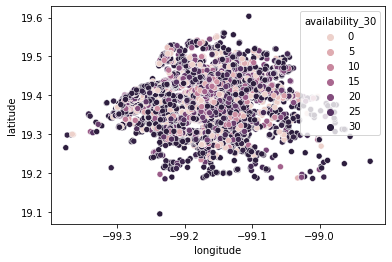

In [63]:
sns.scatterplot(data=june, x='longitude', y='latitude', hue='availability_30')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = june.select_dtypes(['number']).drop(columns=['price']).fillna(0)
y = june['price']

In [ ]:
pca = PCA()
pca.fit(X)

In [ ]:
pd.DataFrame(data=pca.explained_variance_ratio_, index=X.columns).sort_values(by=0, ascending=False).head(20)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(random_state=1331)
reg.fit(X, y)

In [ ]:
reg.score(X, y)

In [65]:
june.columns

Index(['latitude', 'longitude', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'bathrooms_count',
       'forecasted_revenue'],
      dtype='object')

In [107]:
# Chained assignment to work with raw data. Must turn price to float and get bathroom count from bathroom_text
(
    june[
        [
            "id",
            "last_scraped",
            "latitude",
            "longitude",
            "room_type",
            "accommodates",
            "bedrooms",
            "beds",
            "price",
            "availability_30",
            "availability_60",
            "availability_90",
            "availability_365",
            "bathrooms_text",
        ]
    ]
    .astype({"last_scraped": "datetime64", "room_type": "category"})
    .assign(
        price_float=lambda x: x.price.str.replace("[\$,]", "", regex=True).astype(
            "float"
        ),
        bathrooms_count=lambda x: x.bathrooms_text.str.extract("(\d+(?:\.\d+)?)")
        .fillna(0)
        .astype("float"),
        year=lambda x: x.last_scraped.dt.year,
        month=lambda x: x.last_scraped.dt.month,
        day=lambda x: x.last_scraped.dt.day,
        first_mo_occ=lambda x: (30 - x.availability_30),
        second_mo_occ=lambda x: (60 - x.availability_60) - x.first_mo_occ,
        third_mo_occ=lambda x: (90 - x.availability_90) - x.first_mo_occ - x.second_mo_occ,
        month_1_revenue=lambda x: x.price_float * x.first_mo_occ,
        month_2_revenue=lambda x: x.price_float * x.second_mo_occ,
        month_3_revenue=lambda x: x.price_float * x.third_mo_occ,
        total_90_day_revenue=lambda x: (90 - x.availability_90) * x.price_float
    )
    .drop(columns=["price", "bathrooms_text"])
)

,id,last_scraped,latitude,longitude,room_type,accommodates,bedrooms,beds,availability_30,availability_60,...,year,month,day,first_mo_occ,second_mo_occ,third_mo_occ,month_1_revenue,month_2_revenue,month_3_revenue,total_90_day_revenue
0,52390579,2022-06-21,19.395126,-99.277374,Private room,1,3.0,1.0,30,60,...,2022,6,21,0,0,0,0.0,0.0,0.0,0.0
1,35797,2022-06-21,19.382830,-99.271780,Entire home/apt,2,1.0,1.0,28,58,...,2022,6,21,2,0,0,8112.0,0.0,0.0,8112.0
2,15511977,2022-06-21,19.410950,-99.244180,Private room,2,1.0,1.0,29,59,...,2022,6,21,1,0,0,800.0,0.0,0.0,800.0
3,44616,2022-06-22,19.411620,-99.177940,Entire home/apt,14,5.0,8.0,26,53,...,2022,6,22,4,3,0,72000.0,54000.0,0.0,126000.0
4,34776449,2022-06-21,19.426410,-99.225910,Private room,3,1.0,2.0,23,46,...,2022,6,21,7,7,2,12453.0,12453.0,3558.0,28464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,618034488468131637,2022-06-21,19.499980,-99.226010,Entire home/apt,4,1.0,2.0,20,50,...,2022,6,21,10,0,0,6730.0,0.0,0.0,6730.0
21665,22107097,2022-06-21,19.507870,-99.220670,Entire home/apt,3,1.0,2.0,0,9,...,2022,6,21,30,21,0,26910.0,18837.0,0.0,45747.0
21666,40617809,2022-06-21,19.507530,-99.225060,Entire home/apt,1,1.0,1.0,0,0,...,2022,6,21,30,30,30,6900.0,6900.0,6900.0,20700.0
21667,569519288654139909,2022-06-21,19.493360,-99.229090,Entire home/apt,1,1.0,1.0,19,49,...,2022,6,21,11,0,0,7590.0,0.0,0.0,7590.0
